In [15]:
import sys 
import os

In [26]:
modules_path = os.path.abspath(os.path.join(os.getcwd(), 'Modules'))
sys.path.append(modules_path)

In [27]:
from causalsim import *
import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [2]:
def run_experiment(learners, data_str, num_sim):

    '''n = n  # Number of individuals
    p = p     # Number of covariates
    beta = beta  # Beta_1 value for treatment effect
    sigma = sigma # Sigma value for noise term'''

    metrics_result = {}
    for learner in learners:
            metrics_result[learner] = {'mse': [], 'bias': [], 'r2': []}
        
    
    for i in range(num_sim):
        data = eval(data_str)
        tau = np.array(data['tau'])

        for learner in learners:
            tau_hat = eval(learners[learner])
            metric_i = metrics.evaluate(tau, tau_hat)

            if metric_i[0] < -50 or metric_i[0] > 50:
                continue
                
            metrics_result[learner]['mse'].append(metric_i[0])
            metrics_result[learner]['bias'].append(metric_i[1])
            metrics_result[learner]['r2'].append(metric_i[2])
            
        
    
    return metrics_result

In [3]:
def plot_metric(metric_name, res, title_label, xlabel, log = True):
 
    models = list(next(iter(res.values())).keys())
    

    iv = list(res.keys())
    
    plt.figure(figsize=(8, 6))  # 

    # Loop through each model and plot the metric for that model across iv
    for model in models:
        metric_values = []
        
        for n in iv:
            metric_values.append(np.mean(res[n][model][metric_name]))  # Taking the mean of the list

        #print(model, metric_values)
        # Plot each model's metrics against the iv
        print(model, metric_values)
        plt.plot(iv, metric_values, label=model, marker='o')
    
    # Labeling the plot
    plt.title(f'{metric_name.upper()} vs {title_label}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{metric_name.upper()}')
    plt.legend(title='Model')
    plt.grid(True)
    if log:
        plt.xscale('log')  # Optional: Log scale if IV varies greatly
    plt.show()

# X Learner Sim 1 - Unbalanced case with simple CATE

In [5]:
res = {}
for n in [10000,50000,100000]:
    p = 20
    learners = {"LR" : "Causal_LR(data)", "X" : "Causal_XLearner(data, LinearRegression())", 
                "DR" : "Causal_DRLearner(data)", "CF" : "Causal_CausalForest(data)",
                "T" : "Causal_TLearner(data, LinearRegression())" , "S" : "Causal_SLearner(data, LinearRegression())"}
    data_str = f"simulation_XLearner_1({n}, {p})"
    res[n] = run_experiment(learners, data_str, 3)

LR [18.268128982857807, 16.155613656488672, 16.34246604513415]
X [7.639879023649012, 6.22210877112479, 6.036745107575392]
DR [10.44436952406563, 6.802866535398418, 6.247568455162853]
CF [15.874836531635085, 4.102285153776838, 2.1477890023727695]
T [7.639879023649015, 6.222108771124791, 6.036745107575393]
S [16.337221744478565, 15.941736806469534, 15.901829438426475]


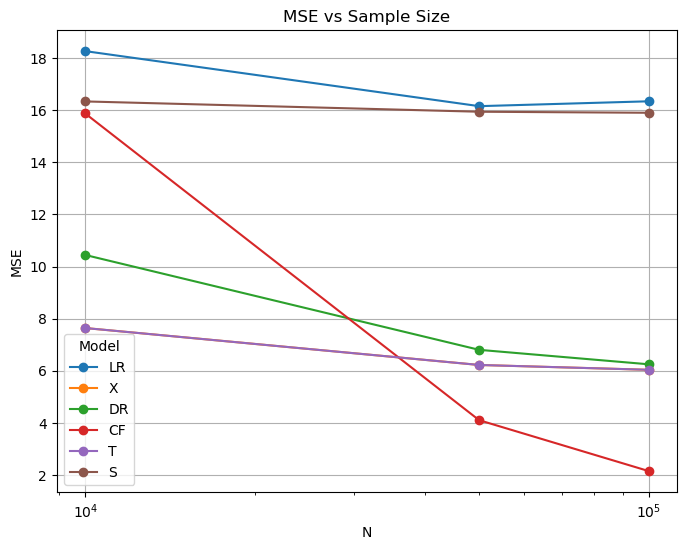

LR [-0.0043597840281465365, -0.2905423445926834, -0.05641120269387976]
X [0.06601150934256664, 0.10790040938831234, -0.10485448618665556]
DR [-0.6420131433808135, 0.1349605960352129, -0.06463317744292026]
CF [-0.46516926698011324, 0.23831626491052707, 0.12780823740920355]
T [0.06601150934256265, 0.10790040938831273, -0.10485448618665448]
S [-0.6464783369125963, 0.13581489915811426, -0.06341177541964704]


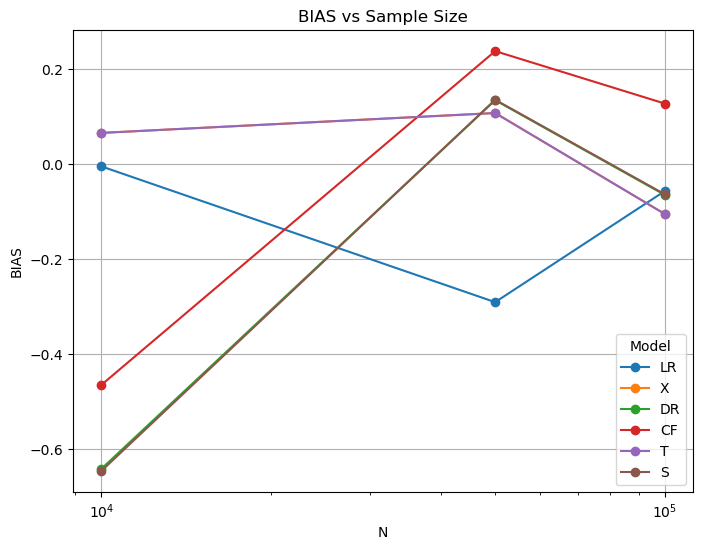

LR [-0.1491587630358091, -0.015514537755628574, -0.02810250275788177]
X [0.5194114575047027, 0.6088905152893376, 0.6202288584693558]
DR [0.3429739850760438, 0.5723820072915599, 0.6069658925987101]
CF [0.0013984839763897527, 0.742133798469697, 0.8648822837724577]
T [0.5194114575047025, 0.6088905152893376, 0.6202288584693558]
S [-0.027713084096051627, -0.002067787011232299, -0.0003847729744313651]


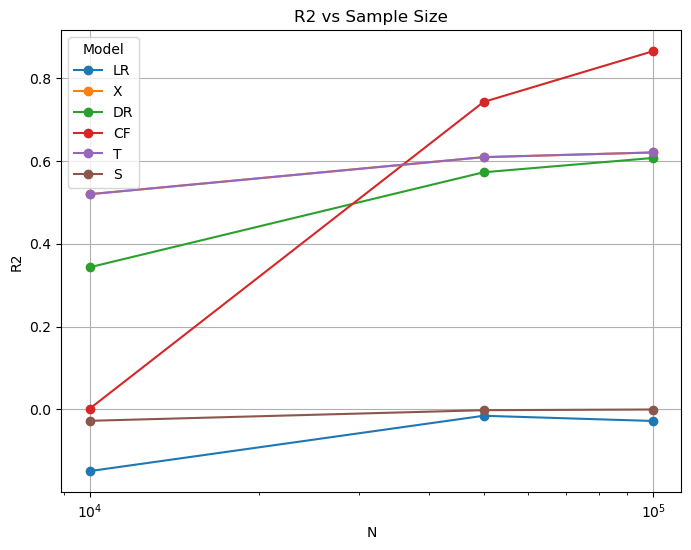

In [6]:
# Call the function for each metric
for metric in ['mse', 'bias', 'r2']:
    plot_metric(metric, res, "Sample Size", "N")

# X-Learner Sim 2 Balanced case with complex non-linear CATE

In [4]:
res = {}
for n in [1000,10000,100000]:
    p = 20
    learners = {"LR" : "Causal_LR(data)", "X" : "Causal_XLearner(data, RandomForestRegressor())", 
                "DR" : "Causal_DRLearner(data)", "CF" : "Causal_CausalForest(data)",
                "T" : "Causal_TLearner(data, RandomForestRegressor())" , "S" : "Causal_SLearner(data, RandomForestRegressor())"}
    data_str = f"simulation_XLearner_2({n}, {p})"
    res[n] = run_experiment(learners, data_str, 3)

LR [0.8809888513143127, 0.9394418840990449, 0.9297758456931677]
X [0.1745194824201379, 0.13902636378950226, 0.11720283251722312]
DR [0.7810758252250026, 0.7542353851122794, 0.7426883019851894]
CF [0.08914725153098664, 0.03118932316479971, 0.012870345865599002]
T [0.45683100630644796, 0.4521694407209876, 0.42776930295500687]
S [0.40556756900698665, 0.4544281053798626, 0.4277111883050599]


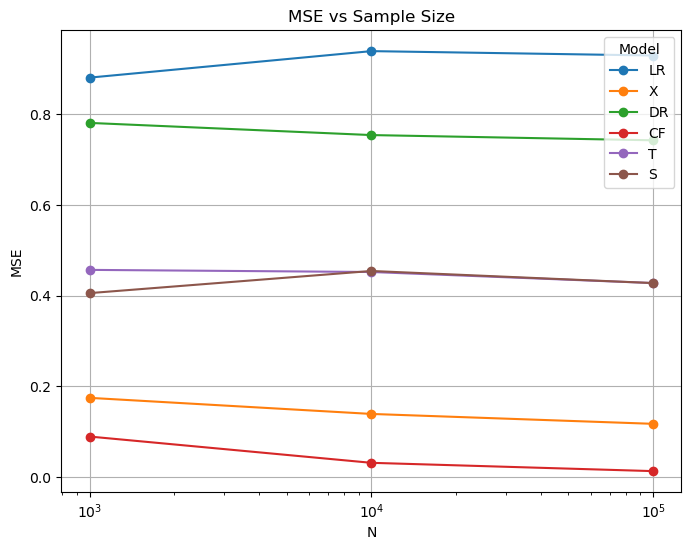

LR [0.053069937575802584, -0.01372760637891305, -0.0021963918919438792]
X [0.051792354150338483, -0.013489112567556659, -0.00227171505108636]
DR [0.06259318768138818, -0.013955834556938782, -0.002893588657174794]
CF [0.05061819267190768, -0.01938546940324502, 0.00024665478000783503]
T [0.0534428488571738, -0.013479543934488386, -0.002598515884724582]
S [0.15887522720724132, -0.013707486199593623, -0.0017103069599891686]


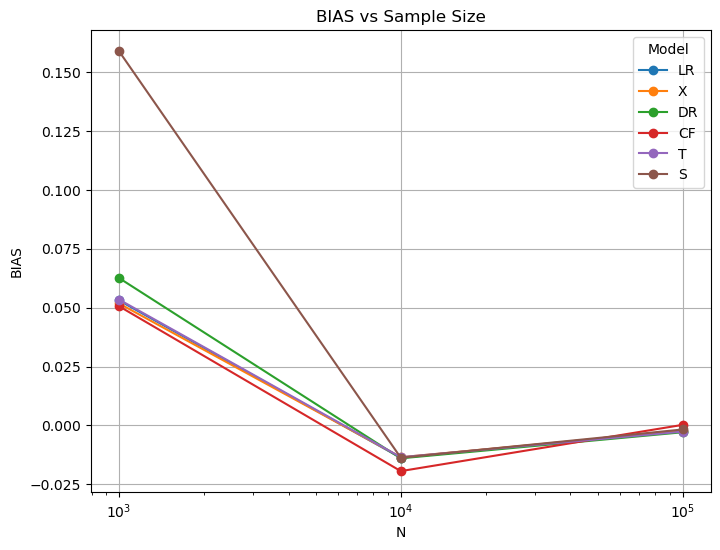

LR [0.1634684361697575, 0.1752426759168292, 0.16529051825803462]
X [0.8343702299362613, 0.877913188936006, 0.8947785433446301]
DR [0.2584686057616751, 0.3377308125164736, 0.33324778309515174]
CF [0.9146550724349676, 0.9726653855360162, 0.9884460502770581]
T [0.5663731282682428, 0.602843027060138, 0.615961772087428]
S [0.613126166191503, 0.6009119480149658, 0.6160141149280969]


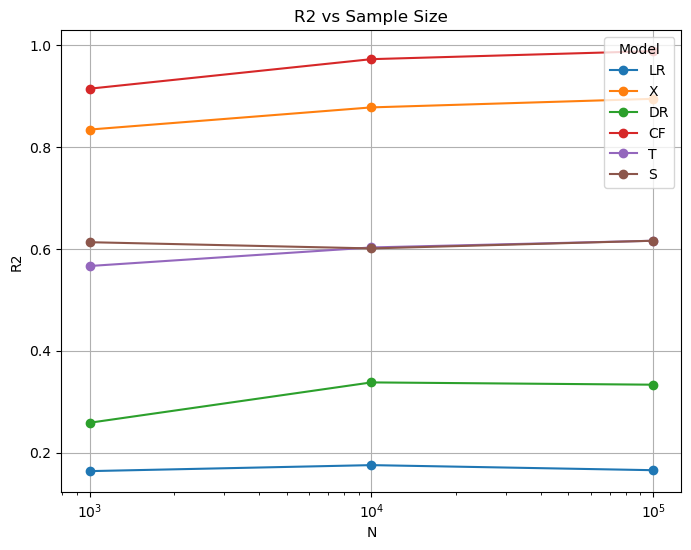

In [11]:
# Call the function for each metric
for metric in ['mse', 'bias', 'r2']:
    plot_metric(metric, res, "Sample Size", "N")